# Download dataset cifar-10
* [download](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz)
* Copie o arquivo `cifar-10-python.tar.gz` para a pasta do projeto
* Execute a celula abaixo

In [1]:
from read_cifar import read_cifar10
(train_images, train_labels), (test_images, test_labels) = read_cifar10()

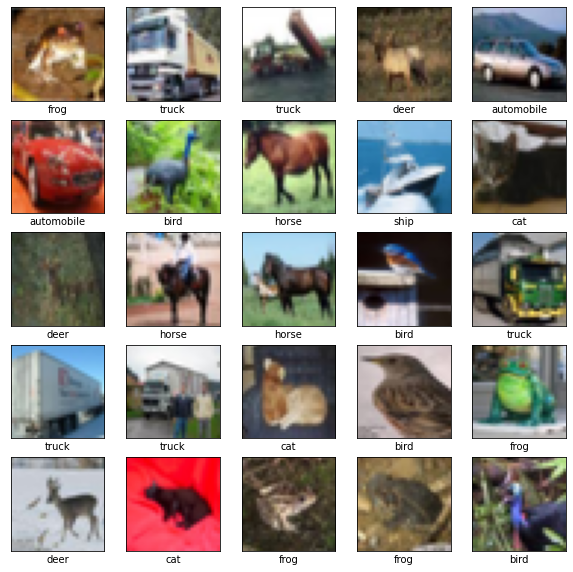

In [2]:
from matplotlib import pyplot as plt
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=50,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1.0/255.0)
# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(train_images)

In [35]:
x, y = next(datagen.flow(train_images, train_labels, batch_size=32))
print(x.shape, y.shape)

(32, 32, 32, 3) (32, 1)


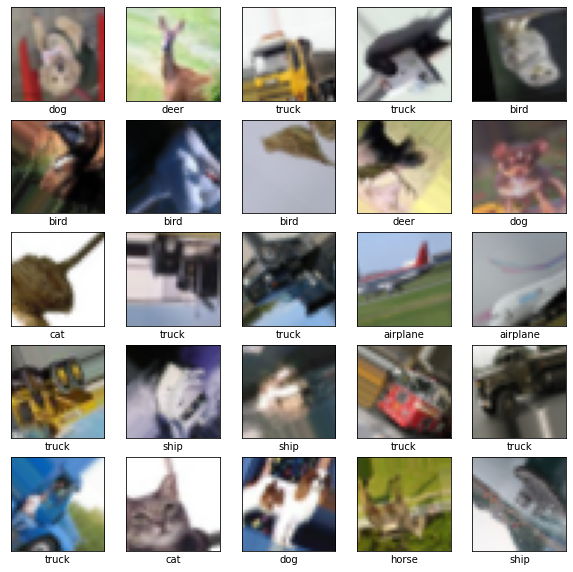

In [36]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x[i])
    plt.xlabel(class_names[int(y[i])])
plt.show()